# Estimate covariance matrix of financial time series (FTS)

In [1]:
import re
import sys
import warnings
import numpy as np # type: ignore
import pandas as pd # type: ignore

sys.path.append('../modules')
import misc_functions as mf # type: ignore
import estimate_entropy as ee # type: ignore
import estimate_market_factors as emf # type: ignore
import get_financial_time_series as get_fts # type: ignore

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
#pd.options.display.max_rows = 277

## Global variables

In [2]:
input_path_raw = "../input_files/raw_data"
input_path_processed = "../input_files/processed_data"
input_path_data_dictionary = "../input_files/data_dictionary"
log_path = "../logs"
output_path = "../output_files"
input_generation_date = "2024-07-24"
stock_index_name = "gdaxi"

time_delta = 240
time_step = 20

## Load data and filter duplicates by symbol and date

In [3]:
# Load data and filter duplicates by symbol and date
df_stock_index = pd.read_pickle(
    "{}/df_stock_index_{}_{}.pkl".format(
        input_path_processed,
        stock_index_name,
        re.sub("-", "", input_generation_date)
    )
)

df_stock_index.drop_duplicates(subset = ["date", "symbol"], keep = "first", inplace = True, ignore_index = True)

## Rolling window analysis

In [4]:
market_args_list = df_stock_index[["date"]].sort_values(by = ["date"]).value_counts(sort = False).reset_index()
market_args_list["final_date"] = market_args_list["date"] + pd.DateOffset(days = time_delta)
market_args_list = (
    market_args_list
        .rename(columns = {"date" : "initial_date"})
        .iloc[::time_step]
        .reset_index()
        .drop(columns = ["count", "index"])
)
market_args_list["initial_date"] = market_args_list["initial_date"].astype(str)
market_args_list["final_date"] = market_args_list["final_date"].astype(str)
market_args_list#.values.tolist()


,initial_date,final_date
0,2000-01-04,2000-08-31
1,2000-02-01,2000-09-28
2,2000-02-29,2000-10-26
3,2000-03-28,2000-11-23
4,2000-04-27,2000-12-23
...,...,...
307,2024-03-06,2024-11-01
308,2024-04-05,2024-12-01
309,2024-05-06,2025-01-01
310,2024-06-03,2025-01-29


In [5]:
# Normalized Returns
df_final_3 = []
for k in range(market_args_list.shape[0]):
    initial_date = market_args_list["initial_date"].values[k]
    final_date = market_args_list["final_date"].values[k]
    try:
        df_aux = emf.get_market_efficiency(
            df = df_stock_index,
            column_ = "z_score_log_return",
            min_bins = 10,
            precision = 12,
            log_path = log_path,
            log_filename = "log_rolling_window_{}".format(stock_index_name),
            log_filename_entropy = "log_entropy_rolling_{}".format(stock_index_name),
            verbose = 1,
            tqdm_bar = True,
            market_args_list = (initial_date, final_date),
            bouchaud_filter = False,
            n = int(df_stock_index.shape[0] * 2),
            df_tracy_widom = pd.read_csv("{}/tracy_widom.csv".format(input_path_data_dictionary), low_memory = False),
            alphas = [0.01, 0.05, 0.10],
            k_max = 8,
            df_onatski = pd.read_csv("{}/onatski.csv".format(input_path_data_dictionary), low_memory = False),
            levels = [1, 2, 5, 10]
        )

        df_final_3.append(df_aux)

        print("Finished: {} - {}".format(initial_date, final_date))
    except:
        print("No done: {} - {}".format(initial_date, final_date))

df_final_3 = pd.concat(df_final_3)

  0%|                               | 0/378 [00:00<?, ?it/s]

In [ ]:
df_final_4 = []
for k in range(market_args_list.shape[0]):
    initial_date = market_args_list["initial_date"].values[k]
    final_date = market_args_list["final_date"].values[k]
    try:
        df_aux = emf.get_market_efficiency(
            df = df_stock_index,
            column_ = "z_score_zlr_no_market",
            min_bins = 10,
            precision = 12,
            log_path = log_path,
            log_filename = "log_rolling_window_residuals_{}".format(stock_index_name),
            log_filename_entropy = "log_entropy_rolling_residuals_{}".format(stock_index_name),
            verbose = 1,
            tqdm_bar = True,
            market_args_list = (initial_date, final_date),
            bouchaud_filter = False,
            n = int(df_stock_index.shape[0] * 2),
            df_tracy_widom = pd.read_csv("{}/tracy_widom.csv".format(input_path_data_dictionary), low_memory = False),
            alphas = [0.01, 0.05, 0.10],
            k_max = 8,
            df_onatski = pd.read_csv("{}/onatski.csv".format(input_path_data_dictionary), low_memory = False),
            levels = [1, 2, 5, 10]
        )

        df_final_4.append(df_aux)

        print("Finished: {} - {}".format(initial_date, final_date))
    except:
        print("No done: {} - {}".format(initial_date, final_date))

df_final_4 = pd.concat(df_final_4)

100%|█████████████████████| 378/378 [00:03<00:00, 99.67it/s]


Finished: 2000-01-04 - 2000-11-29


100%|█████████████████████| 496/496 [00:05<00:00, 93.07it/s]


Finished: 2001-04-23 - 2002-03-19


100%|█████████████████████| 496/496 [00:05<00:00, 94.00it/s]


Finished: 2002-08-09 - 2003-07-05


100%|█████████████████████| 496/496 [00:04<00:00, 99.63it/s]


Finished: 2003-11-25 - 2004-10-20


100%|████████████████████| 528/528 [00:05<00:00, 104.90it/s]


Finished: 2005-03-14 - 2006-02-07


100%|████████████████████| 561/561 [00:05<00:00, 109.94it/s]


Finished: 2006-06-27 - 2007-05-23


100%|████████████████████| 595/595 [00:05<00:00, 114.65it/s]


Finished: 2007-10-11 - 2008-09-05


100%|████████████████████| 595/595 [00:05<00:00, 116.77it/s]


Finished: 2009-02-03 - 2009-12-30


100%|████████████████████| 630/630 [00:05<00:00, 116.03it/s]


Finished: 2010-05-24 - 2011-04-19


100%|████████████████████| 630/630 [00:05<00:00, 109.36it/s]


Finished: 2011-09-02 - 2012-07-28


100%|████████████████████| 630/630 [00:05<00:00, 109.33it/s]


Finished: 2012-12-17 - 2013-11-12


100%|████████████████████| 703/703 [00:06<00:00, 115.95it/s]


Finished: 2014-04-11 - 2015-03-07


100%|████████████████████| 741/741 [00:06<00:00, 118.34it/s]


Finished: 2015-08-05 - 2016-06-30


100%|████████████████████| 741/741 [00:06<00:00, 116.09it/s]


Finished: 2016-11-21 - 2017-10-17


100%|████████████████████| 780/780 [00:06<00:00, 117.24it/s]


Finished: 2018-03-12 - 2019-02-05


100%|████████████████████| 820/820 [00:06<00:00, 119.62it/s]


Finished: 2019-07-05 - 2020-05-30


100%|████████████████████| 861/861 [00:07<00:00, 121.20it/s]


Finished: 2020-10-23 - 2021-09-18


100%|████████████████████| 903/903 [00:07<00:00, 121.79it/s]


Finished: 2022-02-10 - 2023-01-06


100%|████████████████████| 946/946 [00:07<00:00, 122.33it/s]


Finished: 2023-05-26 - 2024-04-20


In [ ]:
df_final_3.to_csv(
    "{}/df_rolling_window_{}_{}.pkl".format(
        input_path_processed,
        stock_index_name,
        re.sub("-", "", input_generation_date)
    ),
    index = False
)
df_final_4.to_csv(
    "{}/df_rolling_window_residuals_{}_{}.pkl".format(
        input_path_processed,
        stock_index_name,
        re.sub("-", "", input_generation_date)
    ),
    index = False
)

## Plot number of factors

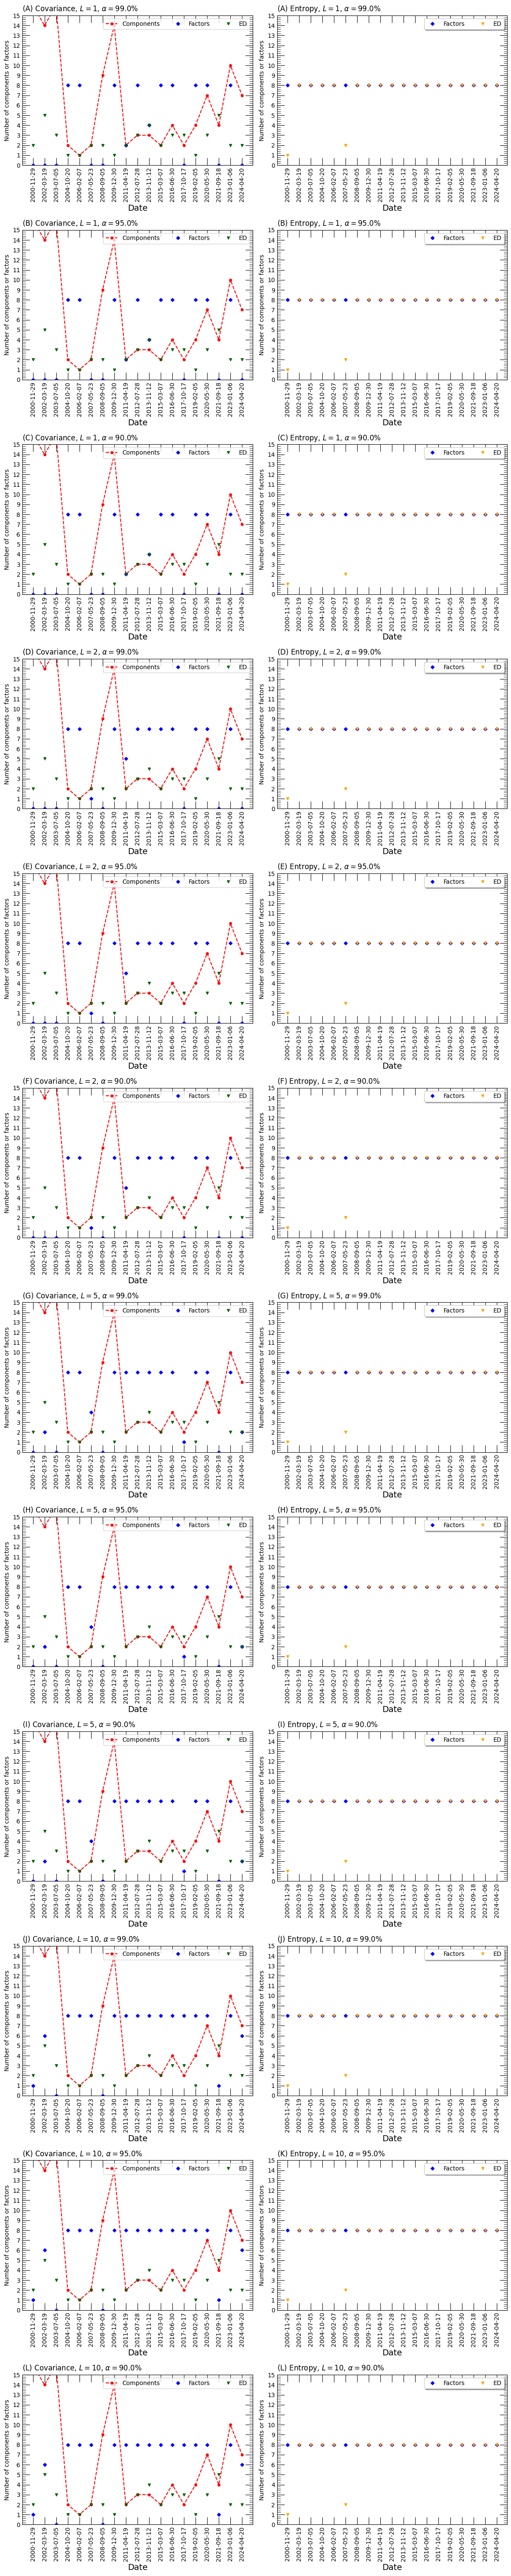

In [ ]:
import matplotlib.pyplot as plt # type: ignore
import matplotlib.dates as mdates # type: ignore
import matplotlib.ticker as mtick # type: ignore

levels_ = df_final_3["level"].unique()
alphas_ = df_final_3["alpha"].unique()

fig,ax = plt.subplots(len(levels_) * len(alphas_), 2)
fig.set_size_inches(w = 12, h = 60)
ms = 4

for i in range(len(levels_)):
    for j in range(len(alphas_)):
        df_aux = df_final_3[((df_final_3["level"] == levels_[i]) & (df_final_3["alpha"] == alphas_[j]))]

        time_labels = pd.date_range(
            start = df_aux["final_date"].min(),
            end = df_aux["final_date"].max(),
            periods = 20
        ).strftime("%Y-%m-%d")

        # Components
        ax[j + i * len(alphas_), 0].plot(df_aux["final_date"], df_aux["n_components_cov"], color = "red", marker = "o", linestyle = "--", markersize = ms, label = "Components")
        #ax[j + i * len(alphas_), 1].plot(df_aux["final_date"], df_aux["n_components_entropy"], color = "red", marker = "o", linestyle = "--", markersize = ms, label = "Components")
        # Factors
        ax[j + i * len(alphas_), 0].plot(df_aux["final_date"], df_aux["n_factors_cov"], color = "blue", marker = "D", linestyle = "", markersize = ms, label = "Factors")
        ax[j + i * len(alphas_), 1].plot(df_aux["final_date"], df_aux["n_factors_entropy"], color = "blue", marker = "D", linestyle = "", markersize = ms, label = "Factors")
        # Edge Distribution
        ax[j + i * len(alphas_), 0].plot(df_aux["final_date"], df_aux["edge_distribution_cov"], color = "darkgreen", marker = "v", linestyle = "", markersize = ms, label = "ED")
        ax[j + i * len(alphas_), 1].plot(df_aux["final_date"], df_aux["edge_distribution_entropy"], color = "orange", marker = "v", linestyle = "", markersize = ms, label = "ED")
        # Axis formatter
        ax[j + i * len(alphas_), 0].tick_params(which = "major", direction = "in", top = True, right = True, labelsize = 10, length = 12)
        ax[j + i * len(alphas_), 0].tick_params(which = "minor", direction = "in", top = True, right = True, labelsize = 10, length = 6)
        ax[j + i * len(alphas_), 0].xaxis.set_major_locator(mdates.AutoDateLocator(maxticks = 100))
        ax[j + i * len(alphas_), 0].xaxis.set_minor_locator(mdates.AutoDateLocator(maxticks = 200))
        ax[j + i * len(alphas_), 0].yaxis.set_major_locator(mtick.MaxNLocator(15))
        ax[j + i * len(alphas_), 0].yaxis.set_minor_locator(mtick.MaxNLocator(5 * 15))
        ax[j + i * len(alphas_), 0].set_xlabel("Date", fontsize = 14)        
        ax[j + i * len(alphas_), 0].set_ylabel("Number of components or factors", fontsize = 10)
        ax[j + i * len(alphas_), 0].tick_params(axis = "x", labelrotation = 90)
        ax[j + i * len(alphas_), 0].set_ylim(0,15) #bbox_to_anchor=(1.1, 1.05)
        ax[j + i * len(alphas_), 0].legend(fancybox = True, shadow = False, ncol = 3, fontsize = 10)
        ax[j + i * len(alphas_), 0].set_title(
            r"({}) Covariance, $L={}$, $\alpha={}\%$".format(chr(j + i * len(alphas_) + 65), levels_[i], (1 - alphas_[j]) * 100),
            loc = "left",
            y = 1.005,
            fontsize = 12
        )

        ax[j + i * len(alphas_), 1].tick_params(which = "major", direction = "in", top = True, right = True, labelsize = 10, length = 12)
        ax[j + i * len(alphas_), 1].tick_params(which = "minor", direction = "in", top = True, right = True, labelsize = 10, length = 6)
        ax[j + i * len(alphas_), 1].xaxis.set_major_locator(mdates.AutoDateLocator(maxticks = 100))
        ax[j + i * len(alphas_), 1].xaxis.set_minor_locator(mdates.AutoDateLocator(maxticks = 200))
        ax[j + i * len(alphas_), 1].yaxis.set_major_locator(mtick.MaxNLocator(15))
        ax[j + i * len(alphas_), 1].yaxis.set_minor_locator(mtick.MaxNLocator(5 * 15))
        ax[j + i * len(alphas_), 1].set_xlabel("Date", fontsize = 14)        
        ax[j + i * len(alphas_), 1].set_ylabel("Number of components or factors", fontsize = 10)
        ax[j + i * len(alphas_), 1].tick_params(axis = "x", labelrotation = 90)
        ax[j + i * len(alphas_), 1].set_ylim(0,15) #bbox_to_anchor=(1.1, 1.05)
        ax[j + i * len(alphas_), 1].legend(fancybox = True, shadow = True, ncol = 3, fontsize = 10)
        ax[j + i * len(alphas_), 1].set_title(
            r"({}) Entropy, $L={}$, $\alpha={}\%$".format(chr(j + i * len(alphas_)+ 65), levels_[i], (1 - alphas_[j]) * 100),
            loc = "left",
            y = 1.005,
            fontsize = 12
        )

plt.tight_layout()
plt.show()

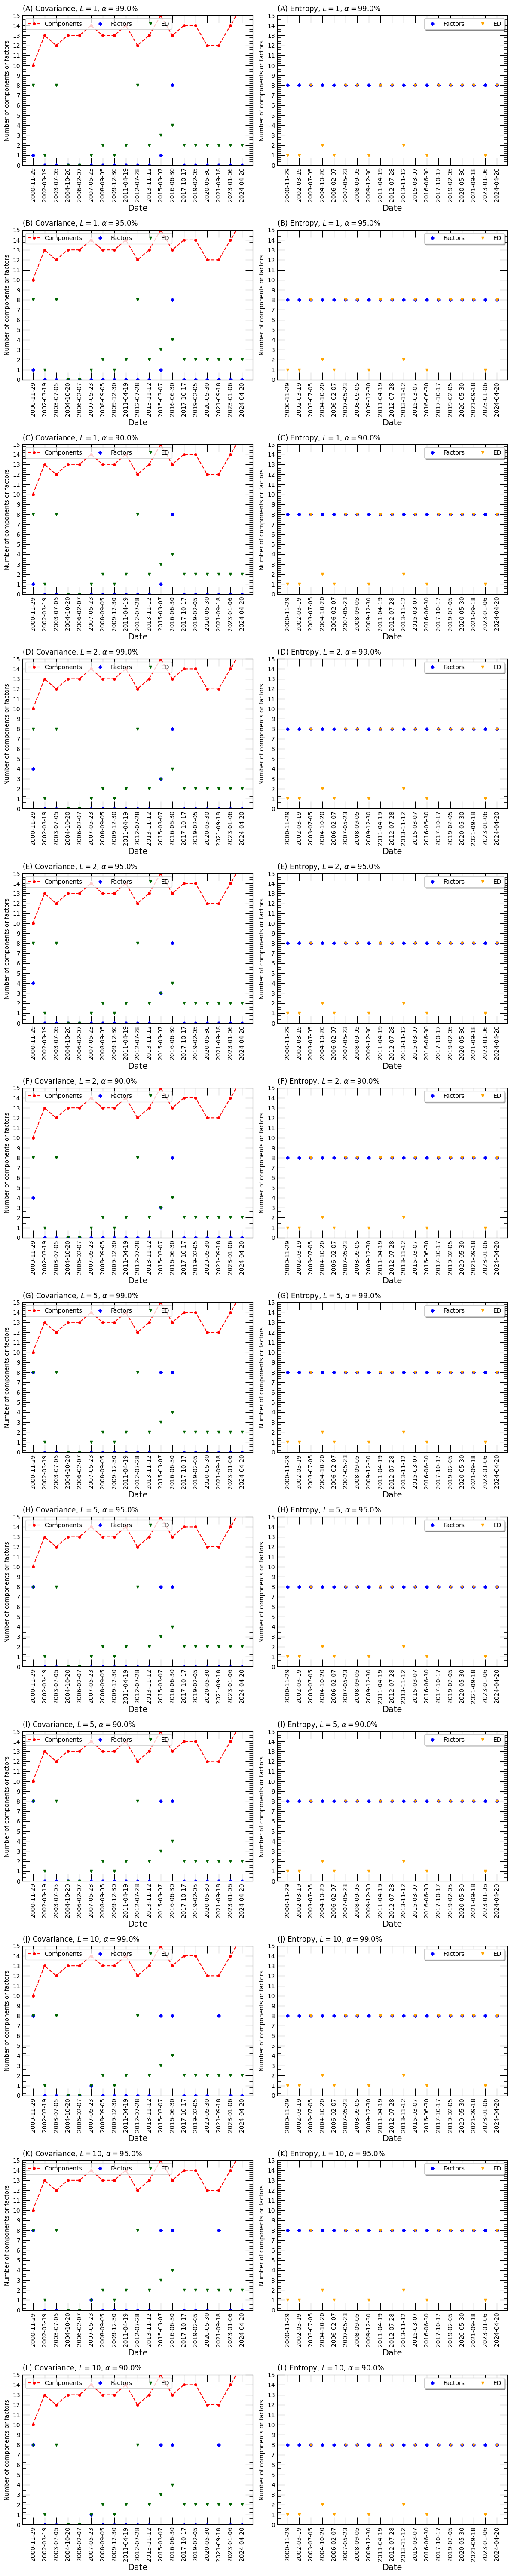

In [ ]:
import matplotlib.pyplot as plt # type: ignore
import matplotlib.dates as mdates # type: ignore
import matplotlib.ticker as mtick # type: ignore

levels_ = df_final_4["level"].unique()
alphas_ = df_final_4["alpha"].unique()

fig,ax = plt.subplots(len(levels_) * len(alphas_), 2)
fig.set_size_inches(w = 12, h = 60)
ms = 4

for i in range(len(levels_)):
    for j in range(len(alphas_)):
        df_aux = df_final_4[((df_final_4["level"] == levels_[i]) & (df_final_4["alpha"] == alphas_[j]))]

        time_labels = pd.date_range(
            start = df_aux["final_date"].min(),
            end = df_aux["final_date"].max(),
            periods = 20
        ).strftime("%Y-%m-%d")

        # Components
        ax[j + i * len(alphas_), 0].plot(df_aux["final_date"], df_aux["n_components_cov"], color = "red", marker = "o", linestyle = "--", markersize = ms, label = "Components")
        #ax[j + i * len(alphas_), 1].plot(df_aux["final_date"], df_aux["n_components_entropy"], color = "red", marker = "o", linestyle = "--", markersize = ms, label = "Components")
        # Factors
        ax[j + i * len(alphas_), 0].plot(df_aux["final_date"], df_aux["n_factors_cov"], color = "blue", marker = "D", linestyle = "", markersize = ms, label = "Factors")
        ax[j + i * len(alphas_), 1].plot(df_aux["final_date"], df_aux["n_factors_entropy"], color = "blue", marker = "D", linestyle = "", markersize = ms, label = "Factors")
        # Edge Distribution
        ax[j + i * len(alphas_), 0].plot(df_aux["final_date"], df_aux["edge_distribution_cov"], color = "darkgreen", marker = "v", linestyle = "", markersize = ms, label = "ED")
        ax[j + i * len(alphas_), 1].plot(df_aux["final_date"], df_aux["edge_distribution_entropy"], color = "orange", marker = "v", linestyle = "", markersize = ms, label = "ED")
        # Axis formatter
        ax[j + i * len(alphas_), 0].tick_params(which = "major", direction = "in", top = True, right = True, labelsize = 10, length = 12)
        ax[j + i * len(alphas_), 0].tick_params(which = "minor", direction = "in", top = True, right = True, labelsize = 10, length = 6)
        ax[j + i * len(alphas_), 0].xaxis.set_major_locator(mdates.AutoDateLocator(maxticks = 100))
        ax[j + i * len(alphas_), 0].xaxis.set_minor_locator(mdates.AutoDateLocator(maxticks = 200))
        ax[j + i * len(alphas_), 0].yaxis.set_major_locator(mtick.MaxNLocator(15))
        ax[j + i * len(alphas_), 0].yaxis.set_minor_locator(mtick.MaxNLocator(5 * 15))
        ax[j + i * len(alphas_), 0].set_xlabel("Date", fontsize = 14)        
        ax[j + i * len(alphas_), 0].set_ylabel("Number of components or factors", fontsize = 10)
        ax[j + i * len(alphas_), 0].tick_params(axis = "x", labelrotation = 90)
        ax[j + i * len(alphas_), 0].set_ylim(0,15) #bbox_to_anchor=(1.1, 1.05)
        ax[j + i * len(alphas_), 0].legend(fancybox = True, shadow = False, ncol = 3, fontsize = 10)
        ax[j + i * len(alphas_), 0].set_title(
            r"({}) Covariance, $L={}$, $\alpha={}\%$".format(chr(j + i * len(alphas_) + 65), levels_[i], (1 - alphas_[j]) * 100),
            loc = "left",
            y = 1.005,
            fontsize = 12
        )

        ax[j + i * len(alphas_), 1].tick_params(which = "major", direction = "in", top = True, right = True, labelsize = 10, length = 12)
        ax[j + i * len(alphas_), 1].tick_params(which = "minor", direction = "in", top = True, right = True, labelsize = 10, length = 6)
        ax[j + i * len(alphas_), 1].xaxis.set_major_locator(mdates.AutoDateLocator(maxticks = 100))
        ax[j + i * len(alphas_), 1].xaxis.set_minor_locator(mdates.AutoDateLocator(maxticks = 200))
        ax[j + i * len(alphas_), 1].yaxis.set_major_locator(mtick.MaxNLocator(15))
        ax[j + i * len(alphas_), 1].yaxis.set_minor_locator(mtick.MaxNLocator(5 * 15))
        ax[j + i * len(alphas_), 1].set_xlabel("Date", fontsize = 14)        
        ax[j + i * len(alphas_), 1].set_ylabel("Number of components or factors", fontsize = 10)
        ax[j + i * len(alphas_), 1].tick_params(axis = "x", labelrotation = 90)
        ax[j + i * len(alphas_), 1].set_ylim(0,15) #bbox_to_anchor=(1.1, 1.05)
        ax[j + i * len(alphas_), 1].legend(fancybox = True, shadow = True, ncol = 3, fontsize = 10)
        ax[j + i * len(alphas_), 1].set_title(
            r"({}) Entropy, $L={}$, $\alpha={}\%$".format(chr(j + i * len(alphas_) + 65), levels_[i], (1 - alphas_[j]) * 100),
            loc = "left",
            y = 1.005,
            fontsize = 12
        )

plt.tight_layout()
plt.show()